<a href="https://colab.research.google.com/github/Kumarisimran626/Netfilx-Movies-TV-shows-clustering/blob/main/S_K_Netfilx_Movies_%26_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Project-Title : Netfilx Movies & TV shows clustering</u></b>


#<b/>Project Type - Unsupervised ML</b>


#<b/>Contribution - Individual
###Name - Simran Kumari</b>

#<b/>Project Summary -</b>

#<b/>GitHub Link-

#<b/>Problem Statement</b>

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

##<b/>Important steps that required in this project</b>

1) EDA(Exploratory Data Analysis)

2) Here, we understanding in different countries what type of content is accessible.

3) Is Netflix has increasingly focusing on TV rather than movies in recent years.

4) Clustering similar content by matching text-based features


##<b/>Attribute Information</b>

1) **show_id :**  Unique ID for every Movie / Tv Show

2) **type :**  Identifier - A Movie or TV Show

3) **title :**  Title of the Movie / Tv Show

4) **director :**  Director of the Movie

5) **cast :**  Actors involved in the movie / show

6) **country :**  Country where the movie / show was produced

7) **date_added :**  Date it was added on Netflix

8) **release_year :**  Actual Releaseyear of the movie / show


9) **rating :**  TV Rating of the movie / show

10) **duration :**  Total Duration - in minutes or number of seasons

11) **listed_in :**  Genere

12) **description:**  The Summary description



# **Let's Begin !**

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset Loading
df = pd.read_csv('/content/drive/MyDrive/Netflix /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

## First View of Dataset

In [4]:
# First look of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Bottom rows of dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# Shape of data
rows=df.shape[0]
columns=df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 7787
Number of columns in dataset are 12


In [7]:
# Columns of data
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#<b/>Data processing</b>

###Duplicate values

In [9]:
# Duplicate Values
df.duplicated().sum()

0

#### Function for extracting complete information of all columns in data set. Information as follows
* Missing values
* Percentage of missing values
* unique value

In [10]:
#Viewing null value
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Figure size 1200x800 with 0 Axes>

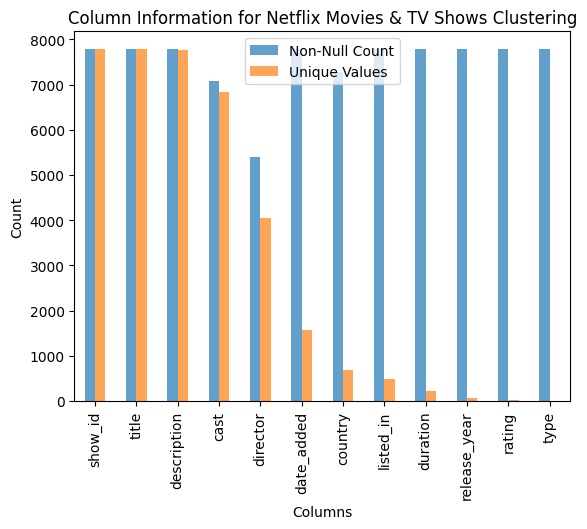

In [11]:
# Define the Complete_columns_info function
def Complete_columns_info(df):
    # Create a DataFrame to store the column information
    column_info = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Unique Values': df.nunique()
    })

    # Sort the DataFrame by the number of unique values (optional)
    column_info = column_info.sort_values(by='Unique Values', ascending=False)

    # Create a bar plot
    plt.figure(figsize=(12, 8))
    column_info.plot(kind='bar', alpha=0.7)
    plt.title('Column Information for Netflix Movies & TV Shows Clustering')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Call the function to visualize column information for your clustering dataset
Complete_columns_info(df)


In [12]:
# total nulll values
df.isnull().sum().sum()

3631

The dataset contains a total of 3,631 null values and 2,389 null value in director column, 718 and 507 in  the cast and country column and 7 in the rating column. It is necessary to address these null values .

In [13]:
# Handling null values
df['cast'].fillna(value='No Cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [14]:
# 'date_added' and 'rating' contains an unnecessary portion of the data so we will drop them from dataset.
df.dropna(subset=['date_added', 'rating'], inplace = True)

In [15]:
#droping director column
df.drop(['director'],axis=1,inplace=True)

In [16]:
# checking null values
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#<b/>EDA(Exploratory Data Analysis)

###<b/>1. Count of Movies and Tv Shows</b>

In [17]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [18]:
# visualization code

labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]

# Colors
colors = ['#bf00bf', '#00bfbf	']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

<b/>1. Why did you pick the specific chart?</b>

**Answer Here-**

This specific chart is a pie chart. I take this chart because it is useful or more effective in visualizing the distribution of categorical data. Here, the chart is used to represent the types of content watched on netfilx, which are categorized as 'Movie' and 'Tv Shows'.

<b/>2. What is/ are the insight(s) found from the chart?</b>

**Answer Here-**

The insight from the chart is the count of movies and Tv shows, here Tv shows constitue the majority that is 69.1%, while movies have smaller percentage that is 30.9%.


<b/>3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.</b>

**Answer Here-**

The data indicates a clear preference for TV shows over movies, with a significantly higher percentage of 69.1% compared to the lower percentage of 30.9% for movies. This suggests that people tend to enjoy shorter formats like TV shows rather than investing their time in longer movies that may be less engaging.




###<b/>3. In which year maximum no. of Movies released?</b>

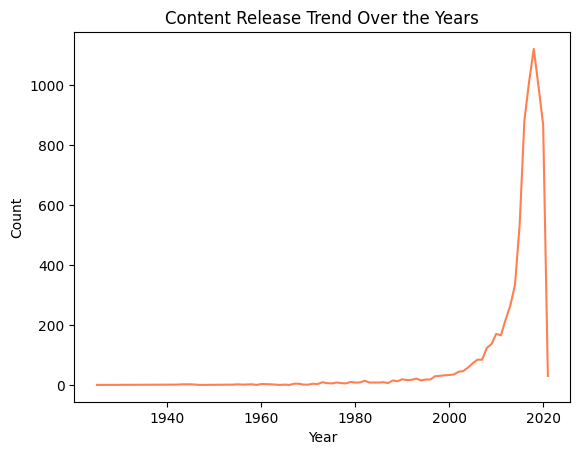

In [19]:
# Content Release Trend Over the Years
release_trend = df["release_year"].value_counts().sort_index()
release_trend.plot(kind="line",color='coral')
plt.title("Content Release Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<b/>1. Why did you pick the specific chart?</b>

**Answer Here-**

I chose a line chart to visualize the content release trend over the years because it effectively displays the changes and patterns in content releases over time.

<b/>2. What is/are the insight(s) found from the chart?</b>

**Answer Here-**

The insights gained from the chart include understanding the trend in content releases over the years. By observing the line chart, we can identify any increasing or decreasing patterns.


<b/>3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.</b>

**Answer Here-**

The gained insights can potentially help to create a positive business impact. Understanding the content release trend over the years can inform content planning, scheduling, and strategic decision-making. It can help identify popular release periods, seasonality patterns, or gaps in content releases.

##<b/>4. In which category get highest ratings of movies released?</b>

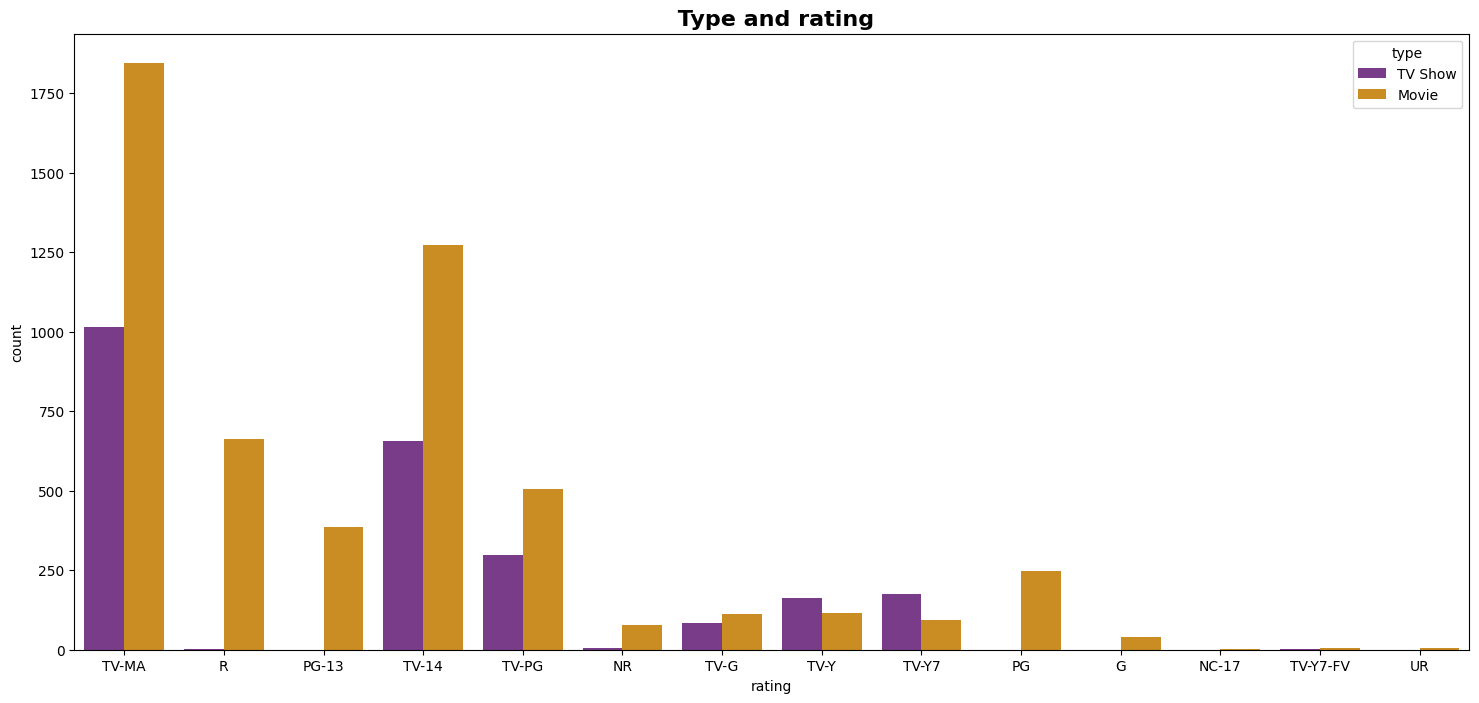

In [20]:
# Rating
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=df,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

TV-MA get more ratings means the most of the content is for adult oriented.

###<b/>5. Which genere is most popular?</b>

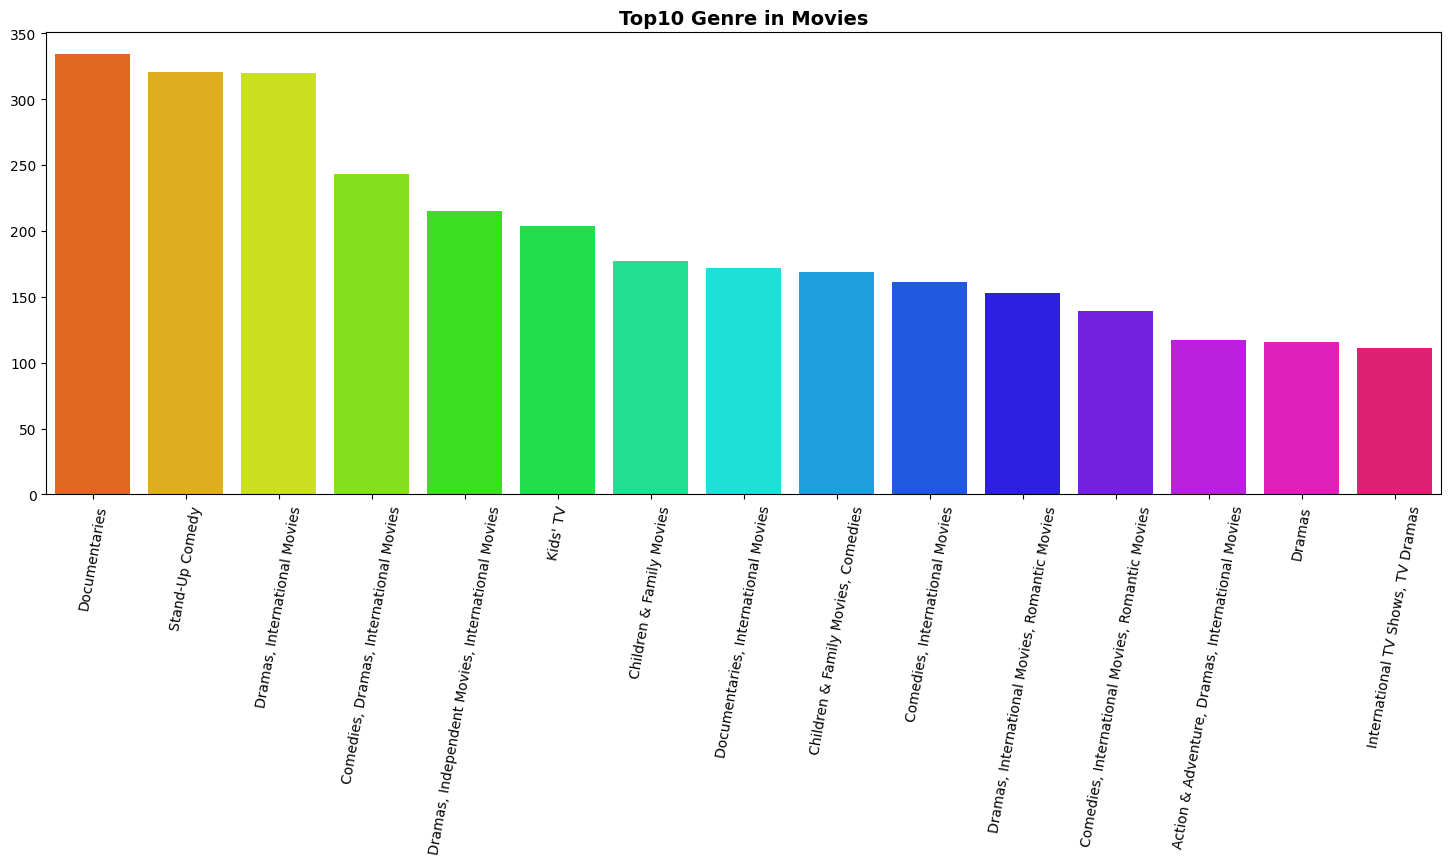

In [21]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='14',fontweight="bold")
plt.show()

<b/>From the graph, we know that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies.</b>

##<b/>6. Top Actor on netflix</b>

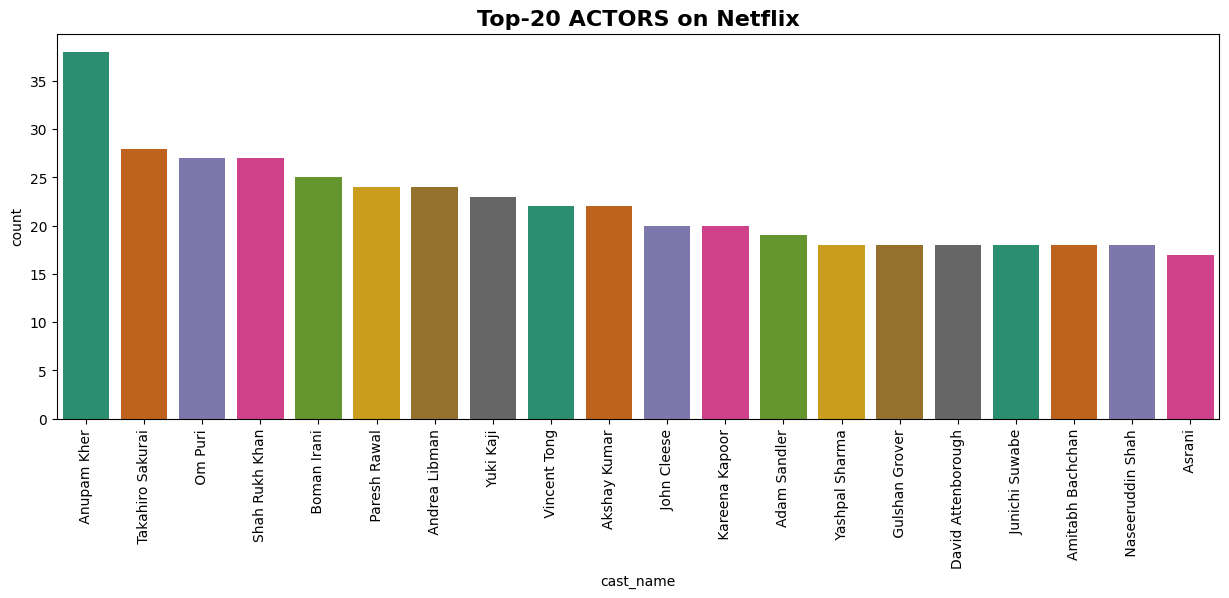

In [22]:
# Top 20 actors netflix
df['cast_name'] = df['cast'].apply(lambda x :  x.split(','))
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

<b/>The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.</b>

### <b/>7. Top 10 countries with the most content.</b>

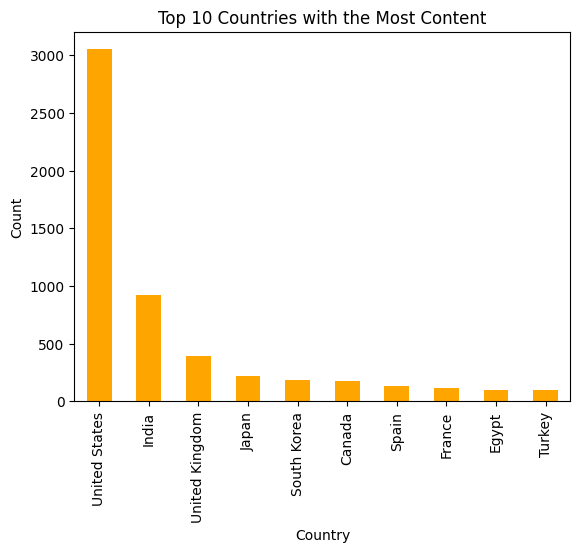

In [26]:
# Bar Chart - Top 10 Countries with the Most Content
top_countries = df["country"].value_counts().head(10)
top_countries.plot(kind="bar",color='orange')
plt.title("Top 10 Countries with the Most Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

<b/>1. Why did you pick the specific chart?</b>

I chose a bar chart to showcase the top 10 countries with the most content because it allows for a clear visual comparison of the content count for each country.

<b/>2. What is/are the insight(s) found from the chart?</b>

By examining the heights of the bars, we can identify the United States has the highest number of content offerings

<b/>3. Will the gained insights help creating a positive business impact?</b>

<b/>Are there any insights that lead to negative growth? Justify with specific reason.</b>

The gained insights can help create a positive business impact. Understanding which countries have the most content can inform business decisions such as content acquisition, localization efforts, and marketing strategies. It can provide insights into audience preferences, popularity of content from different regions, and potential target markets for expansion.

In [27]:
#top_two countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country

,index,country
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


<BarContainer object of 11 artists>

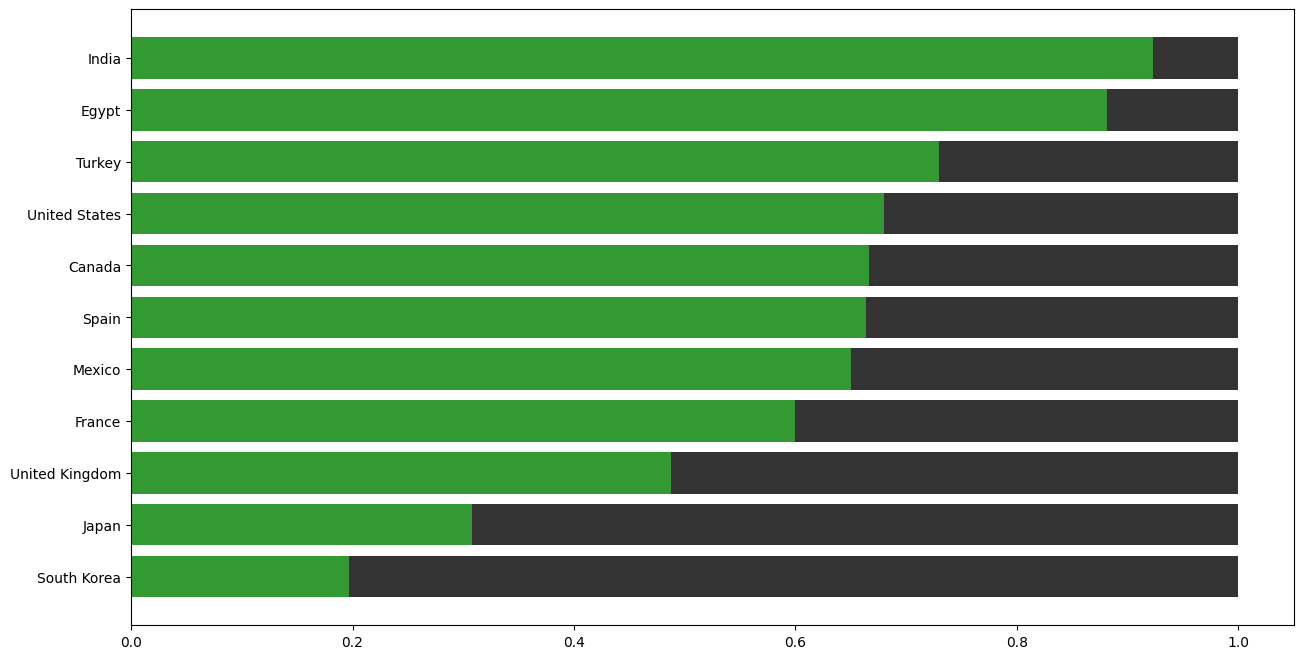

In [28]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='green', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

<b/>India contain highest number of movies on netflix.</b>